In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (norm, t)
from ExplanatoryAnalysis import (ExplanatoryPlots, MLE)
import warnings
warnings.filterwarnings("ignore")

## Importing The Data

In [2]:
ticker = "GM"
start = "2000-01-01"
end = "2024-12-31"

data = yf.download(tickers = ticker, start = start, end = end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


## Explanatory Data Analysis

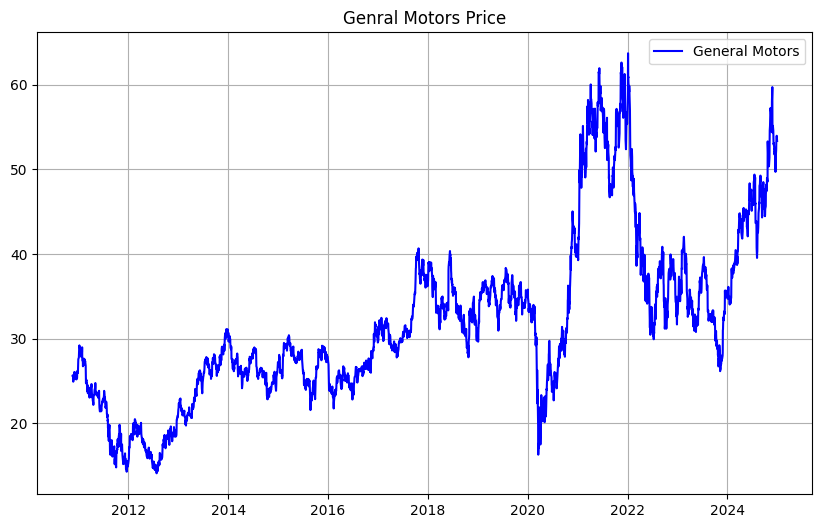

In [3]:
# first plotting the prices of General Motors
plt.figure(figsize = (10, 6))
plt.plot(data["Close"], 
         color = "blue", 
         label = "General Motors")

plt.grid()
plt.title("Genral Motors Price")
plt.legend()

plt.show()

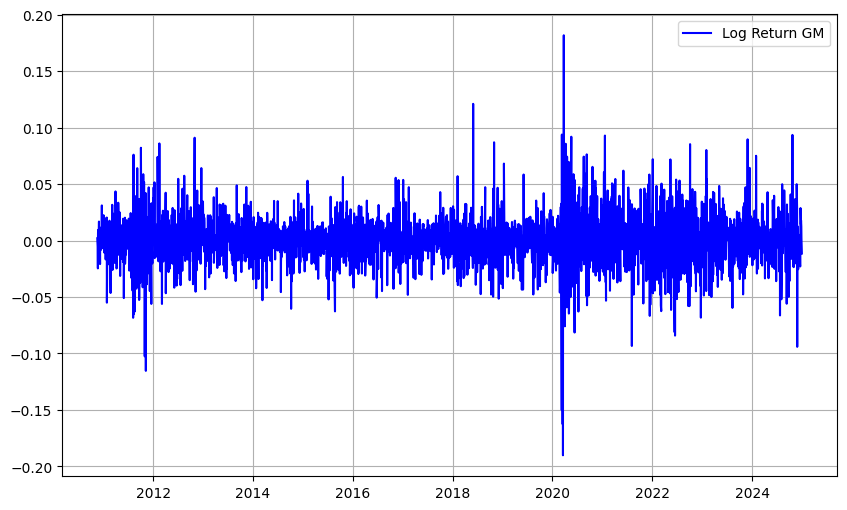

In [4]:
#Second, computing the returns of the time series

data["log_ret"] = np.log(data["Close"]/data["Close"].shift(1))
data.dropna(inplace = True)

plt.figure(figsize = (10, 6))
plt.plot(data["log_ret"], 
         color = "blue", 
         label = "Log Return GM")

plt.legend()
plt.grid()

plt.show()

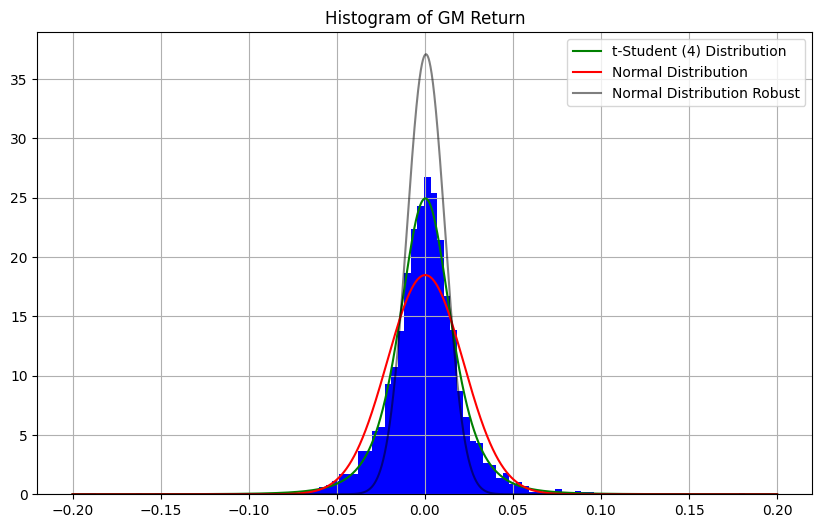

In [11]:
def mad(x: np.array)-> float:
    """ 
    Function Used to compute the MAD (Median Abdolute deviation)
    """
    median = np.median(x)
    return np.median(np.abs(x - median))

unc_mean = np.mean(data["log_ret"])
unc_std = np.std(data["log_ret"])

median = np.median(data["log_ret"])
median_abs_dev = mad(data["log_ret"])

x = np.linspace(-0.2, 0.2, 5000)
y = norm.pdf(x, unc_mean, unc_std)
#for t distribution
mle = MLE(data = data["log_ret"], distribution = "t")
y_t = t.pdf(x, df = mle.mle_df, loc = mle.mle_mean, scale = mle.mle_std)
y_robust = norm.pdf(x, median, median_abs_dev)

plt.figure(figsize = (10, 6))
plt.hist(data["log_ret"], 
         bins = 100,
         color = "blue", 
         density = True)

plt.plot(x, 
         y_t, 
         color = "green", 
         label = f"t-Student ({mle.mle_df}) Distribution")

plt.plot(x, 
         y, 
         color = "red", 
         label = "Normal Distribution")

plt.plot(x, 
         y_robust, 
         color = "black", 
         label = "Normal Distribution Robust", 
         alpha = 0.5)

plt.title("Histogram of GM Return")
plt.grid()
plt.legend()
plt.show()

The t-Distribution seems to fit the data much better than the Normal Distribution

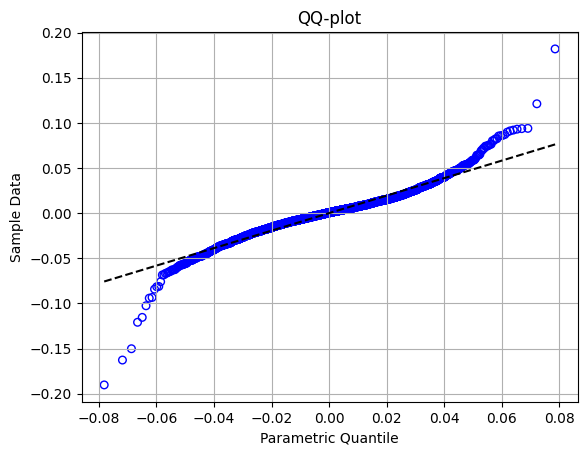

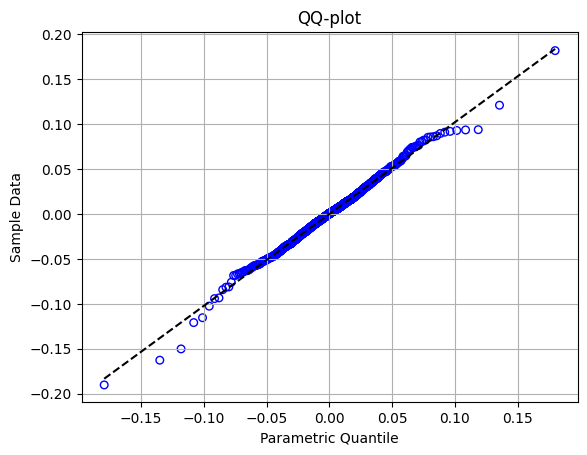

In [12]:
#QQ-plot and Half Normal Plot

plots_norm = ExplanatoryPlots(data = data["log_ret"], distribution = "norm", type = "QQ-plot")
plots_t = ExplanatoryPlots(data = data["log_ret"], distribution = "t", type = "QQ-plot")

plots_norm.QQPlot_Plot()
plots_t.QQPlot_Plot()

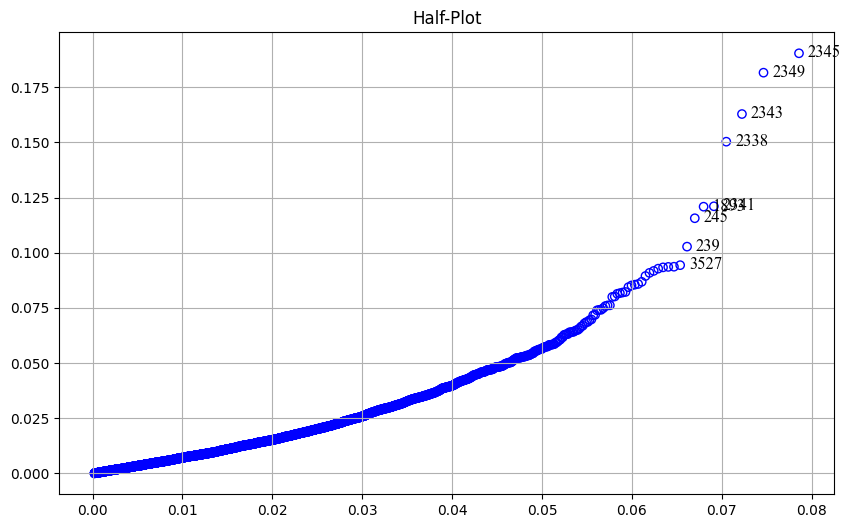

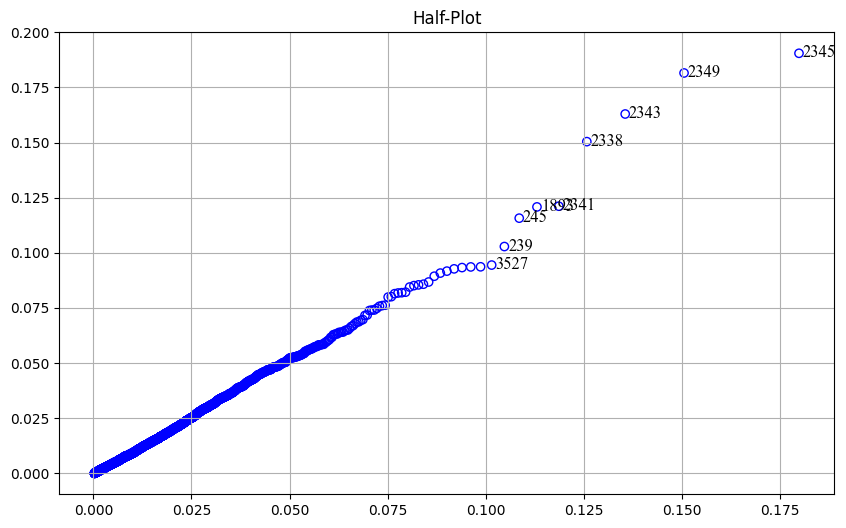

In [13]:
half_normal = ExplanatoryPlots(data["log_ret"], distribution = "norm", type = "Half-plot")
half_normal_t = ExplanatoryPlots(data["log_ret"], distribution = "t", type = "Half-plot")

half_normal.HalfNormal_Plot()
half_normal_t.HalfNormal_Plot()